In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as fmr
import FMR_Evaluator_v210208 as eva

import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

#help(FMR_Reader)

no style found


In [2]:
dataset='BF Cobulky32nm LONG'
d=fmr.read(dataset,loc='../../../messungen/')

100%|██████████| 5201/5201 [01:34<00:00, 55.06it/s]


In [3]:
d

{'version': 'version from 20210422',
 'T_sample(H)': array([    nan, 4.04716, 4.03286, ..., 4.00802, 4.01067, 4.01849]),
 'f': array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,
         4.25,  4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,
         6.5 ,  6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,
         8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75,
        11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ,
        13.25, 13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25,
        15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 ,
        17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75,
        20.  , 20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  ,
        22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25,
        24.5 , 24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 ,
        26.75, 27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75,
        29.  , 29.25, 

In [4]:
db=eva.complex_binning(d,Hmin=-.1, Hmax=1.1, NH=1201)

In [5]:
dn=eva.normS21(db)

In [6]:
dn

{'H': array([-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ]),
 'Hnorm': array([[1.1]]),
 'S21': array([[0.99955133-7.20929625e-04j, 0.99949585-6.49619540e-04j,
         0.99945321-5.43967235e-04j, ..., 0.99996624+1.28882258e-04j,
         0.999988  +7.01988952e-05j, 1.        +0.00000000e+00j],
        [0.9994777 -6.95913682e-04j, 0.99943252-6.05870820e-04j,
         0.9993845 -4.78532081e-04j, ..., 0.99997917+1.55408209e-04j,
         0.99999002+8.49011121e-05j, 1.        +0.00000000e+00j],
        [0.99938871-9.68164530e-04j, 0.99933326-8.96585038e-04j,
         0.99928556-7.66324508e-04j, ..., 0.99997154+1.40636362e-04j,
         0.99999421+8.51326016e-05j, 1.        -2.22044605e-16j],
        ...,
        [0.99486188-3.94211791e-03j, 0.99536862-4.00489441e-04j,
         0.99891157+2.58754512e-03j, ..., 0.99726237+3.28389462e-03j,
         0.99983469+2.48858087e-04j, 1.        -1.11022302e-16j],
        [1.00013429-8.75422669e-03j, 1.00054194-5.23621149e-03j,
         1.001766

<Figure size 3600x2160 with 0 Axes>

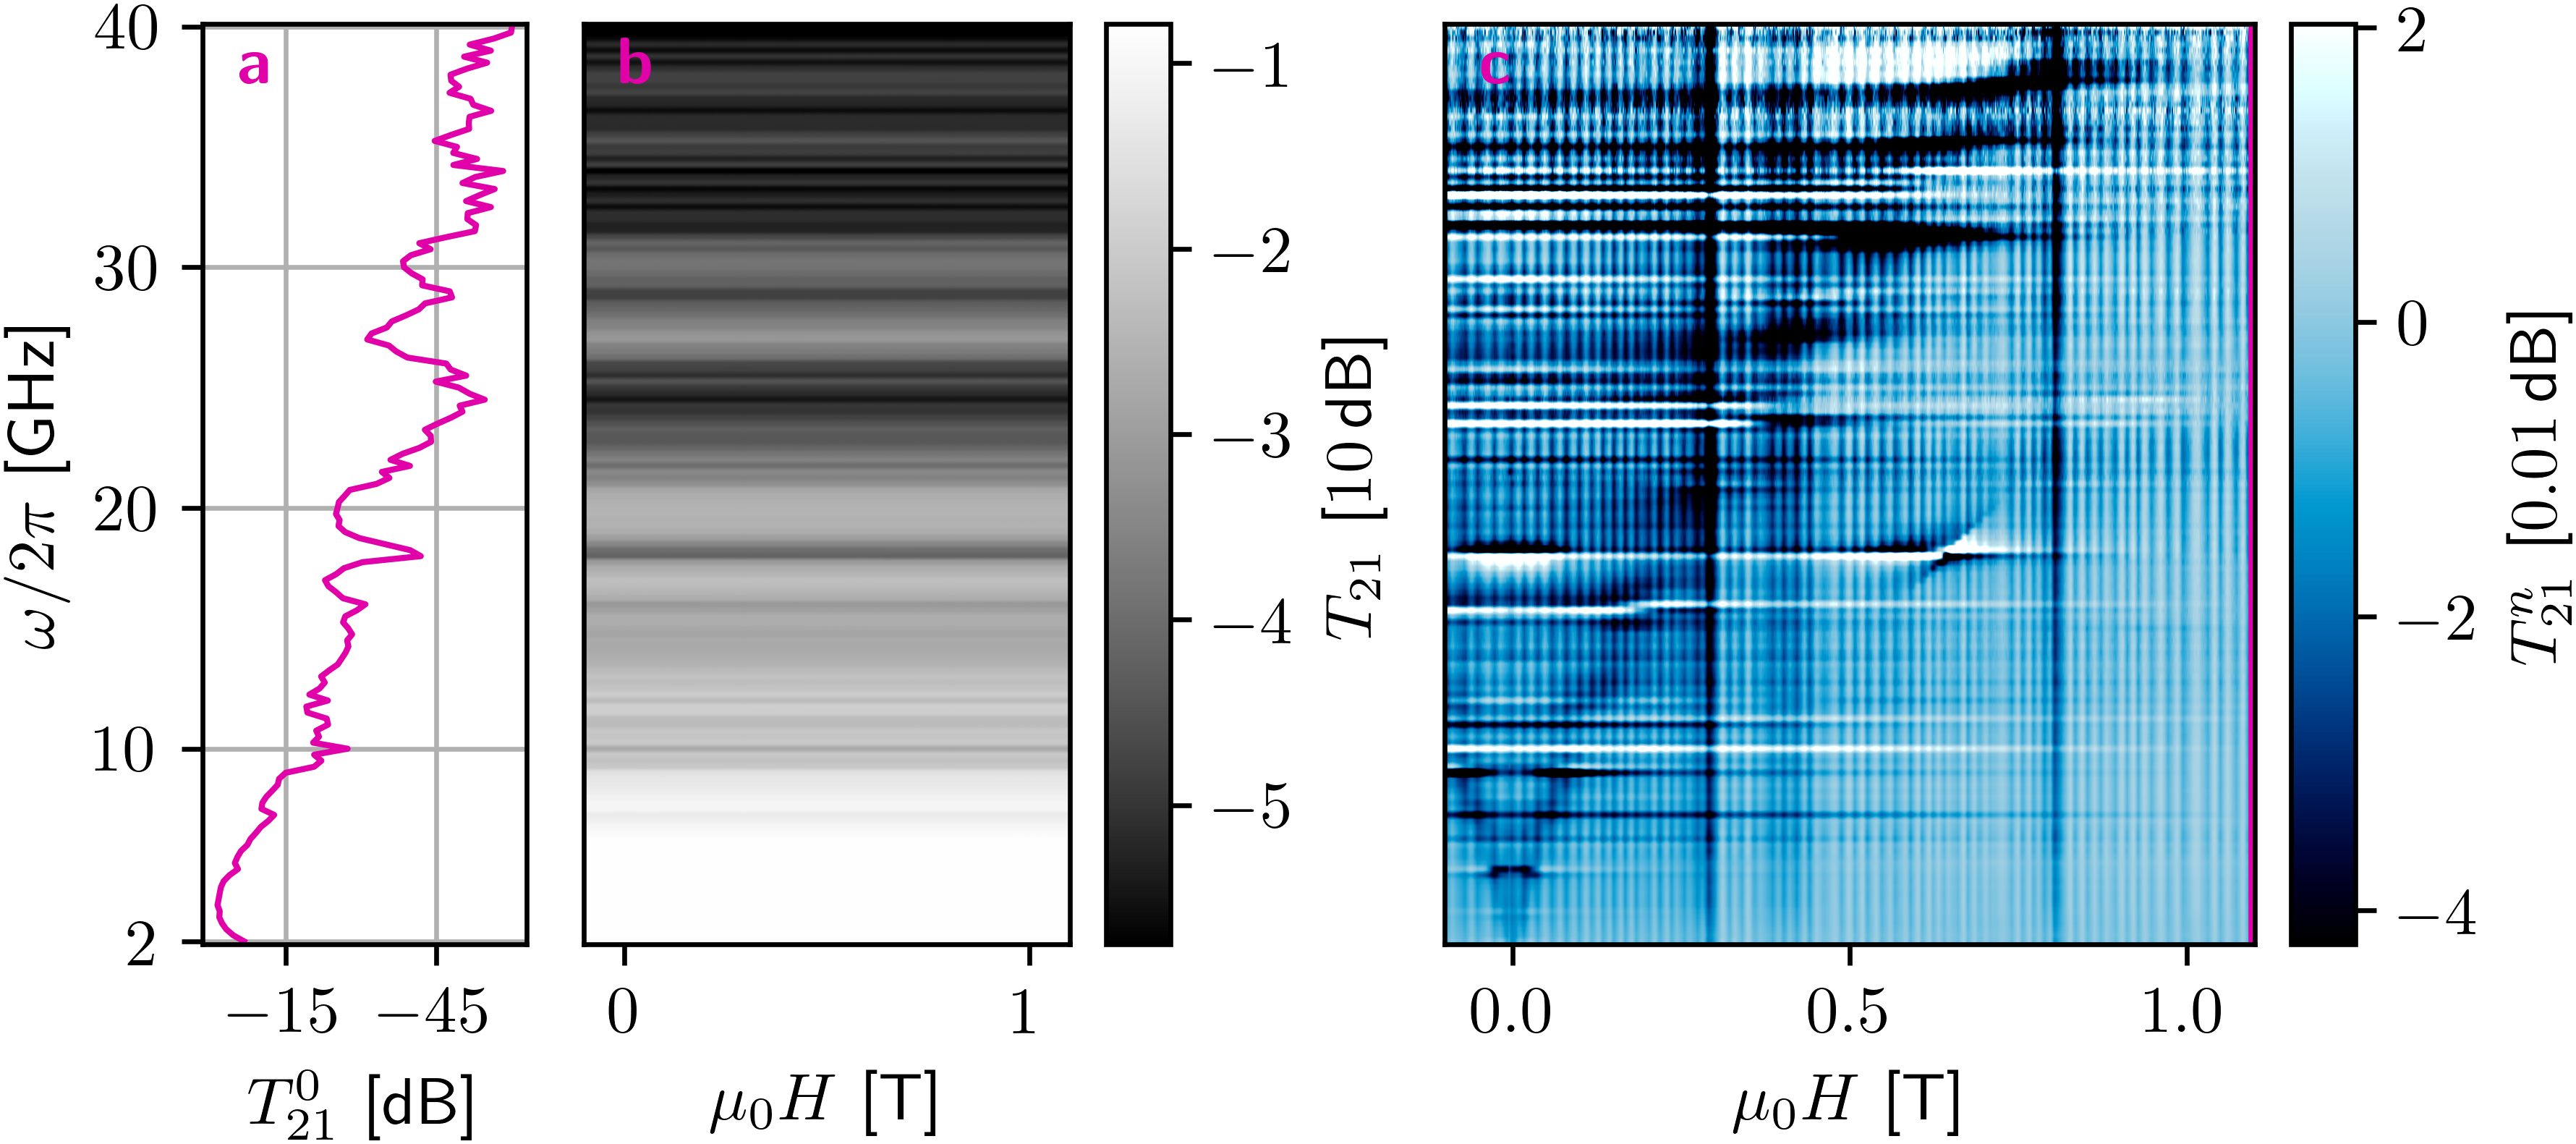

In [16]:

%reload_ext autoreload
%autoreload 2
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img0=20*np.log10(np.abs(db['S21']))/10
img1=20*np.log10(np.abs(dn['S21']))*100
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=dn['H']
freq=dn['f']
Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1.5
fig_nr=0
xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}^0$ [dB]'
clabel='$T_{21}$ [dB]'
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img0=img0[find[0]:find[1],
        Hind[0]:Hind[1]]
img1=img1[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]
plt.close(fig_nr)
fig=plt.figure(fig_nr)


clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
      np.nanmean(img0)+contrast*np.nanstd(img0))
clim1=(np.nanmean(img1)-contrast*np.nanstd(img1),
      np.nanmean(img1)+contrast*np.nanstd(img1))

fig, (ax_norm, ax_img0,ax_clb0, ax_img1,  ax_clb1) = plt.subplots(ncols=5,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,1.5,.2,2.5,.2]},
                                    constrained_layout=True)
norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves(color='magenta')(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.set_yticks([40,30,20,10,2])

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim0,
                   cmap=cpd.images(color='grey'))
ax_img0.set_xlabel(xlabel)
fig.colorbar(im0, cax=ax_clb0,label='$T_{21}$ [$10\,$dB]')

# Take care of image and colorbar   
ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim1,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)
fig.colorbar(im1,label='$T_{21}^n$ [$0.01\,$dB]', cax=ax_clb1)

ax_img1.vlines(1.1, ymin=ext[2], ymax=ext[3], lw=2,
             color=cpd.curves(color='magenta')(1))

ax_norm.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img0.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img1.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')

fig.savefig('really_small.pgf')

<Figure size 1800x1080 with 0 Axes>

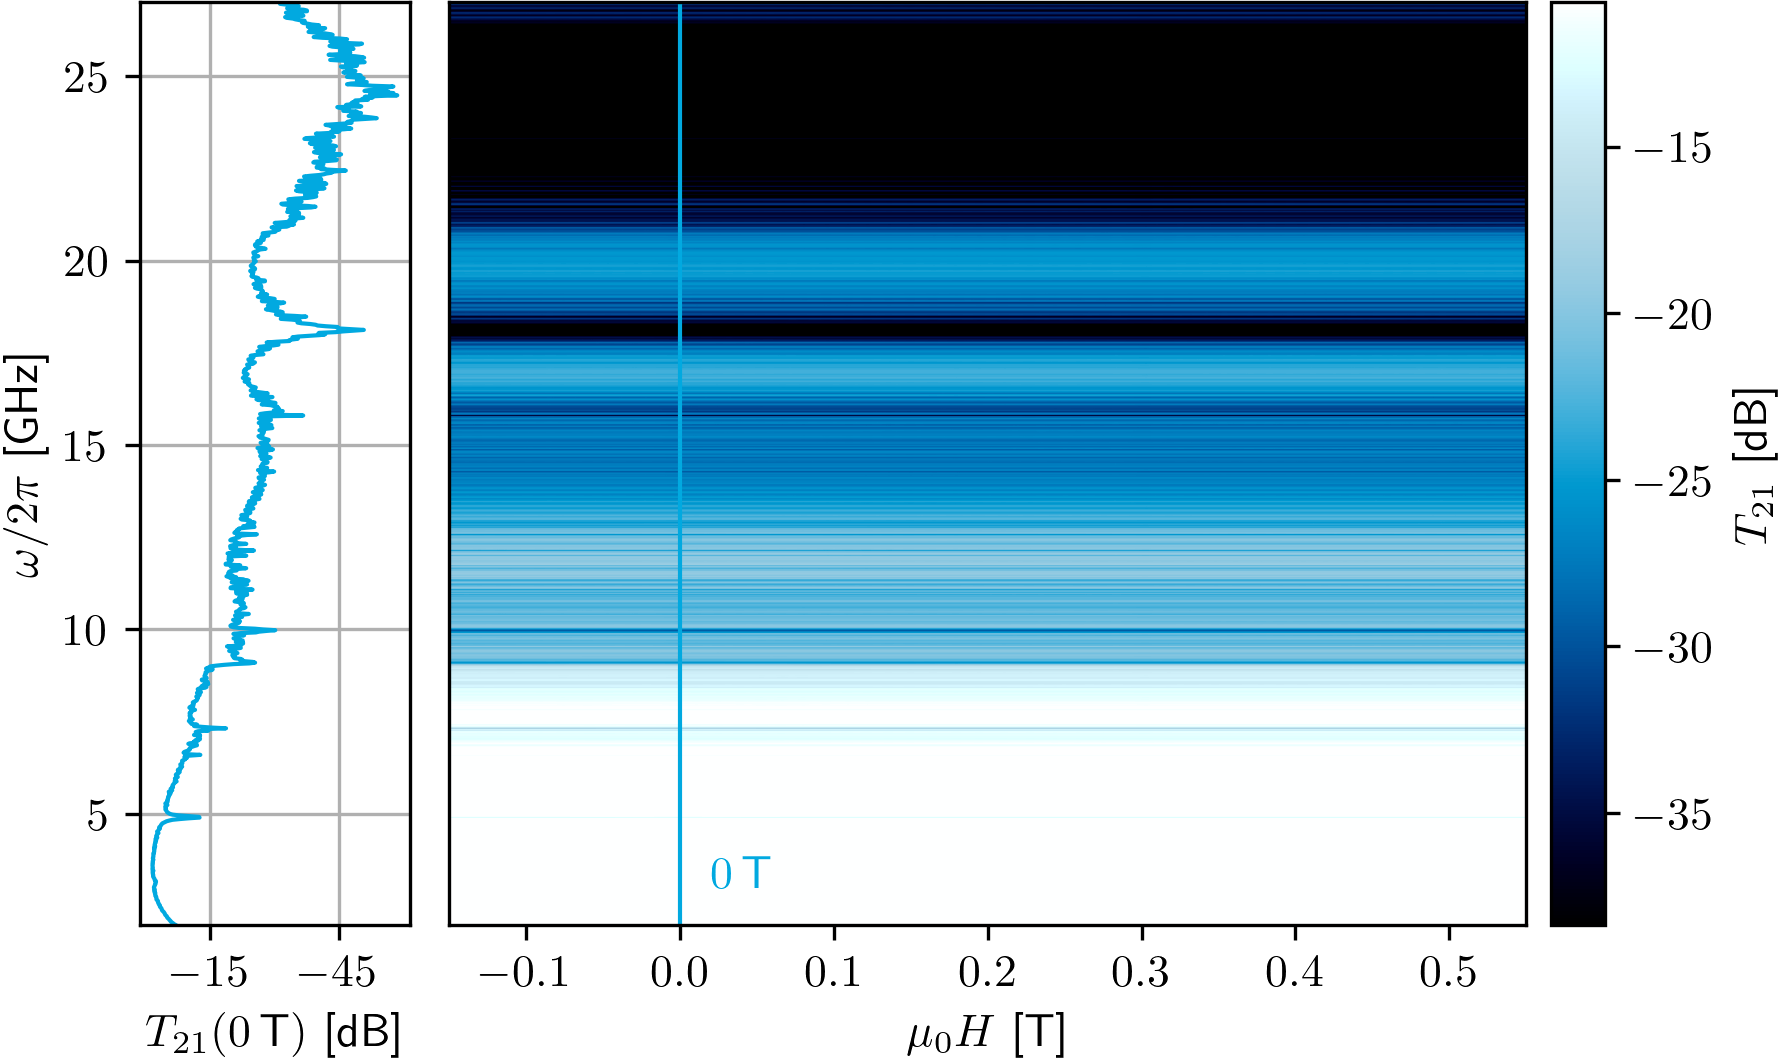

In [13]:

img=20*np.log10(np.abs(db['S21']))
norm=20*np.log10(np.abs(db['S21'][:,np.argmin(np.abs(db['H']))]))
posN=db['H'][np.argmin(np.abs(db['H']))]
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(0\,$T$)$ [dB]'
clabel='$T_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

clim=(np.mean(img)-contrast*np.std(img),
      np.mean(img)+contrast*np.std(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves()(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
ax_img.vlines(posN, ymin=ext[2], ymax=ext[3],
              color=cpd.curves()(1))
ax_img.text(0+.02,3,'$0\,$T',
              color=cpd.curves()(1))

ax_img.set_xticks(np.linspace(-.1,.5,7))

fig.colorbar(im,label=clabel, cax=ax_clb)

#fig.execute_constrained_layout()
fig.savefig('small_signal.pgf')

In [8]:
db=eva.complex_binning(d,Hmin=-.15, Hmax=.55)
dn=eva.normS21(db)
dn

{'H': array([-0.15  , -0.1495, -0.149 , ...,  0.549 ,  0.5495,  0.55  ]),
 'Hnorm': array([[0.55]]),
 'S21': array([[0.99974434+5.39520007e-04j, 0.99971634+5.24967122e-04j,
         0.99968895+5.58681941e-04j, ..., 0.99984329+7.72442604e-05j,
         0.99990787+3.46843307e-05j, 1.        -5.55111512e-17j],
        [0.99970926+5.70892177e-04j, 0.99970251+5.54388559e-04j,
         0.9996695 +5.62222919e-04j, ..., 0.99985464+8.53794320e-05j,
         0.99992491+5.03506696e-05j, 1.        -2.77555756e-17j],
        [0.99972069+5.23832664e-04j, 0.99969218+5.31840518e-04j,
         0.99966495+5.16852570e-04j, ..., 0.99986394+5.59503046e-05j,
         0.99992821+2.86766971e-05j, 1.        -1.00397121e-16j],
        ...,
        [0.99954609+1.51496545e-02j, 0.99948266+1.52397639e-02j,
         0.99927071+1.53169562e-02j, ..., 0.99941371+1.17889075e-03j,
         0.99971541+6.67105829e-04j, 1.        +5.55111512e-17j],
        [0.99877104+1.43289924e-02j, 0.99877591+1.43307188e-02j,
         0

<Figure size 1800x1080 with 0 Axes>

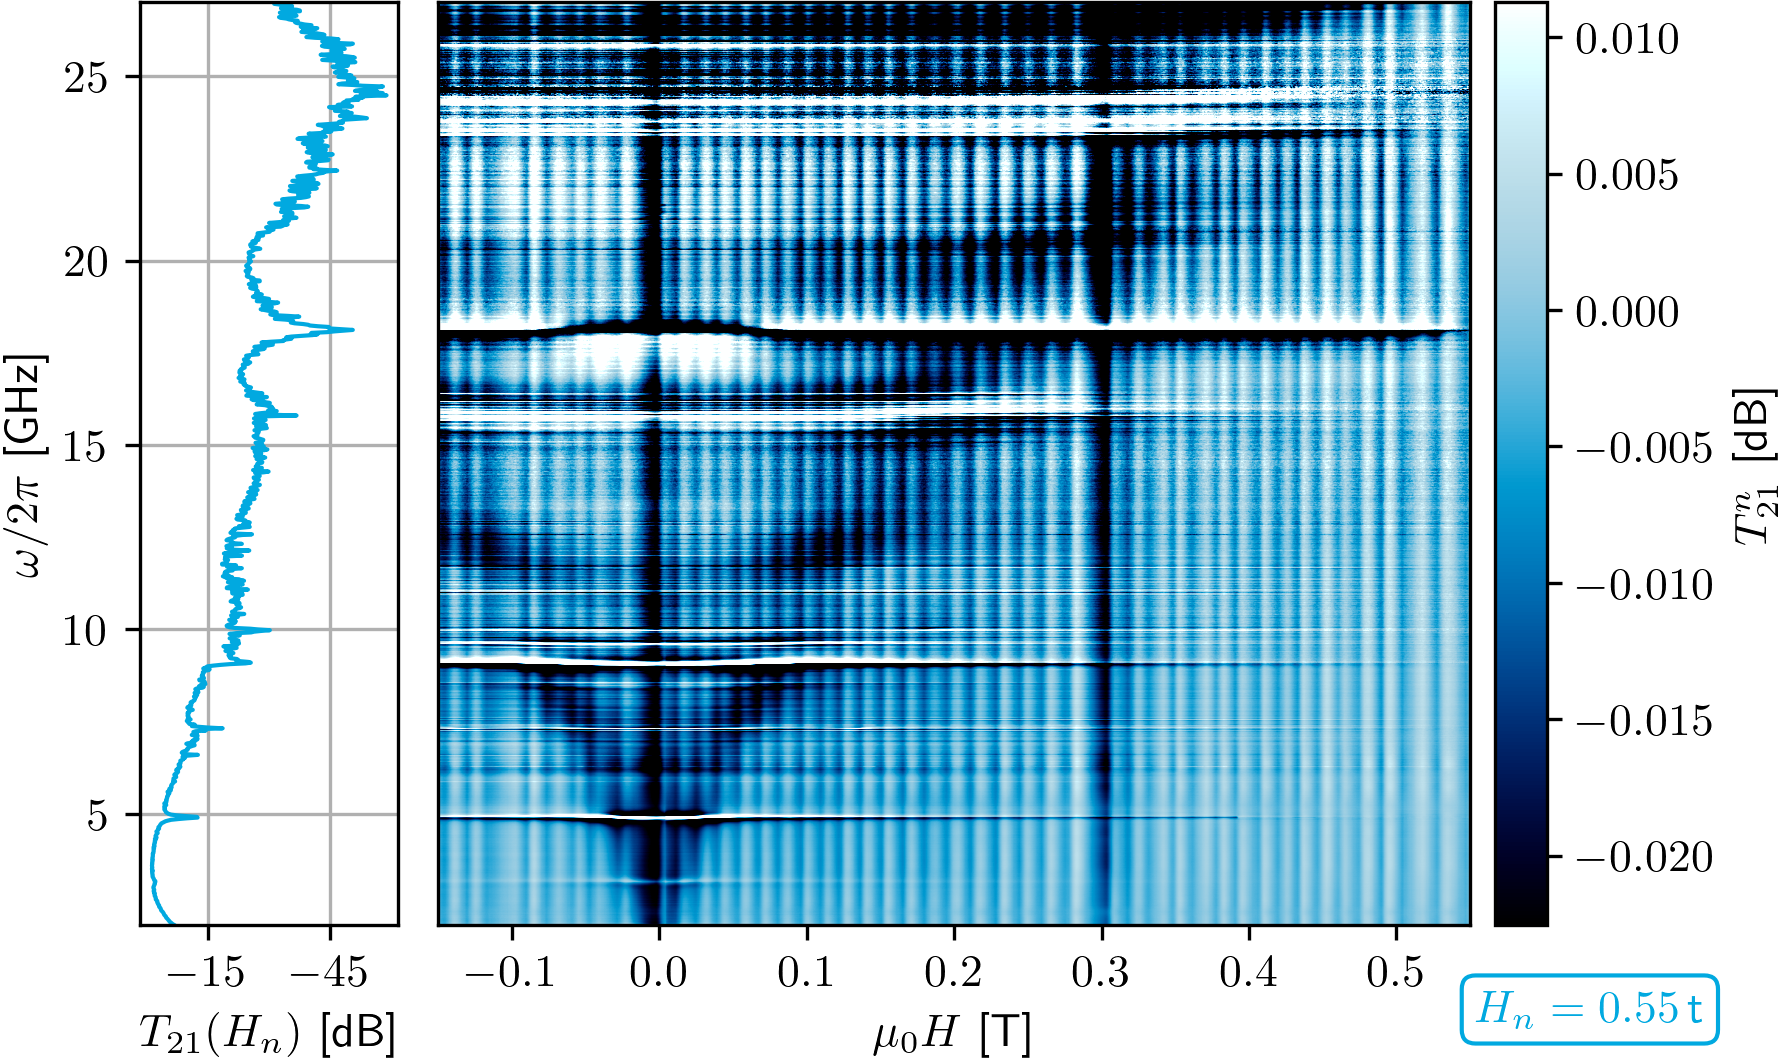

In [14]:
img=20*np.log10(np.abs(dn['S21']))
norm=20*np.log10(np.abs(dn['S21norm']))
posN=dn['Hnorm']
H=db['H']
freq=db['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}(H_n)$ [dB]'
clabel='$T^n_{21}$ [dB]'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(freq[-1]-freq[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(freq-flim[0]).argmin(),
      np.abs(freq-flim[1]).argmin()+1]
img=img[find[0]:find[1],
        Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     freq[find[0]]-stepsizef,
     freq[find[1]-1]+stepsizef]
freq=freq[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img[img==-np.inf]=np.nan
img[img==np.inf]=np.nan
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img, ax_clb) = plt.subplots(ncols=3,
                                    gridspec_kw={"width_ratios":[1,4,.2]},
                                    constrained_layout=True)        

norm=norm[find[0]:find[1]]
ax_norm.plot(norm,freq,c=cpd.curves(color='seeblau')(1))       
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext[2],ext[3])
ax_norm.grid()
ax_norm.invert_xaxis()

nlim=[np.min(norm),np.max(norm)]
enn=np.abs(nlim[1]-nlim[0])/4
nlim=np.around(([(nlim[0]+enn)*2,(nlim[1]-enn)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim)

# Take care of image and colorbar   
ax_img.set_yticks([])
ax_img.set_yticklabels([])
im = ax_img.imshow(img, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_img.set_xlabel(xlabel)
#ax_img.vlines(posN, ymin=ext[2], ymax=ext[3], lw=2,
#              color=cpd.curves(color='magenta')(1),
#              label="$H_n=%3.2f\,$T"%float(posN))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
#fig.text(.845,.07,
#             "$H_n=%3.2f\,$T"%float(posN),
#             color=cpd.curves(color='seeblau')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='seeblau')(1), 
#                       boxstyle='round'))
ax_clb.set_xticks([0])

fig.text(.825,.045,
            "$H_n=%3.2f\,$t"%float(posN),
            color=cpd.curves(color='seeblau')(1),
            bbox=dict(facecolor='white', 
                      edgecolor=cpd.curves(color='seeblau')(1), 
                      boxstyle='round'))

ax_img.set_xticks(np.linspace(-.1,.5,7))
ax_img.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img.set_xlim(ext[0],ext[1])
ax_img.set_ylim(ext[2],ext[3])


fig.colorbar(im,label=clabel, cax=ax_clb)


#fig.execute_constrained_layout()
fig.savefig('normed_signal.pgf')

In [16]:
20*np.log10(2+1),20*np.log10(2)

(9.542425094393248, 6.020599913279624)